# Assignment 2
Name: Amina Shaikh <br>
Roll No. 3369
### 2. Perform the following operations using Python on the Air quality and Heart Diseases data sets
a. Data cleaning <br>
b. Data integration <br>
c. Data transformation <br>
d. Error correcting <br>
e. Data model building <br>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [5]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape

(303, 14)

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
# data cleaning
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
(df == 0).sum(axis=1)   #displays total no of zeros for each row

0      4
1      4
2      5
3      3
4      4
      ..
298    5
299    4
300    3
301    3
302    6
Length: 303, dtype: int64

In [12]:
numeric_data = df.drop(columns=['slope'])
numeric_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,3,0


In [13]:
# data transformation 
# creating subsets 

subset1 = df[df['age']>50]
subset2 = df[df['age']<50]

df_modified = [subset1,subset2]
pd.concat(df_modified)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0


In [14]:
var=df[['age', 'sex', 'cp','trestbps', 'chol' ]]   #accessing grp of rows and cols using label
var

,age,sex,cp,trestbps,chol
0,63,1,3,145,233
1,37,1,2,130,250
2,41,0,1,130,204
3,56,1,1,120,236
4,57,0,0,120,354
...,...,...,...,...,...
298,57,0,0,140,241
299,45,1,3,110,264
300,68,1,0,144,193
301,57,1,0,130,131


In [15]:
target = df['cp']

In [16]:
#training dataset

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(var,target,test_size=0.25,random_state=0)


In [17]:
train_x

,age,sex,cp,trestbps,chol
173,58,1,2,132,224
261,52,1,0,112,230
37,54,1,2,150,232
101,59,1,3,178,270
166,67,1,0,120,229
...,...,...,...,...,...
251,43,1,0,132,247
192,54,1,0,120,188
117,56,1,3,120,193
47,47,1,2,138,257


In [18]:
X=df.drop("restecg",axis=1)
Y=df["restecg"]

In [19]:
Y

0      0
1      1
2      0
3      1
4      1
      ..
298    1
299    1
300    1
301    1
302    0
Name: restecg, Length: 303, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X,Y, test_size=0.2, random_state=42)

#print(X_test.shape, Y_test.shape ) 
#print(X_train.shape, Y_train.shape )

print(X_train.shape, X_test.shape )

(242, 13) (61, 13)


In [21]:
# model building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,mean_absolute_error

In [22]:
lr = LogisticRegression()
lr.fit(train_x,train_y)

C:\Users\amina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
lr_y_pred = lr.predict(test_x)

In [24]:
lr_acc = accuracy_score(test_y,lr_y_pred)
lr_acc

0.9210526315789473

In [25]:
# duplicate
duplicate=df.duplicated().sum() 
if duplicate: 
    print("Duplicated rows :{}".format(duplicate)) 
else: 
    print("No duplicates")

Duplicated rows :1


In [26]:

# error correcting
df['ca'].unique() 
df.ca.value_counts() 
df[df['ca']==4] 
df.loc[df['ca']==4,'ca']=np.NaN 
df['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

In [ ]:
# Outlier Detection and Removal
#z = np.abs(stats.zscore(numeric_data))
#z



<AxesSubplot:>

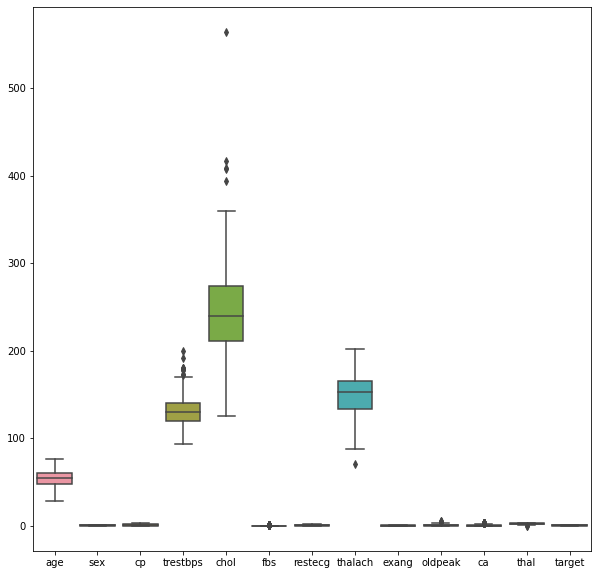

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(data=numeric_data, )

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [4]:
df = pd.read_csv("airquality1.csv",encoding='unicode_escape')
df

C:\Users\amina\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/2015
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/2015
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
